In [90]:
![image.png](attachment:image.png)

'[image.png]' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_input=pd.read_csv("Credit_Risk_Train_Data.csv")

In [3]:
validate_input=pd.read_csv("Credit_Risk_Validate_Data.csv")

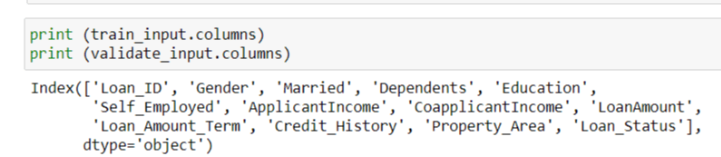

In [4]:
print(train_input.columns)
print(validate_input.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'outcome'],
      dtype='object')


In [5]:
train_input.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


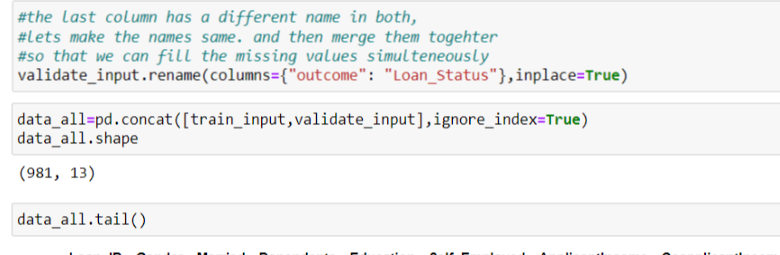

In [7]:
validate_input.rename(columns={"outcome":"Loan_Status"},inplace=True)

In [8]:
data_all=pd.concat([train_input,validate_input],ignore_index=True)
data_all.shape

(981, 13)

In [9]:
data_all

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,Y
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,N


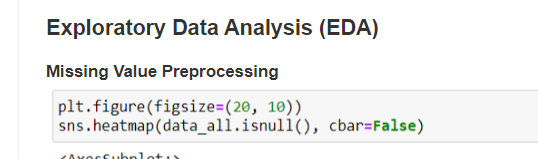

<function seaborn.matrix.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

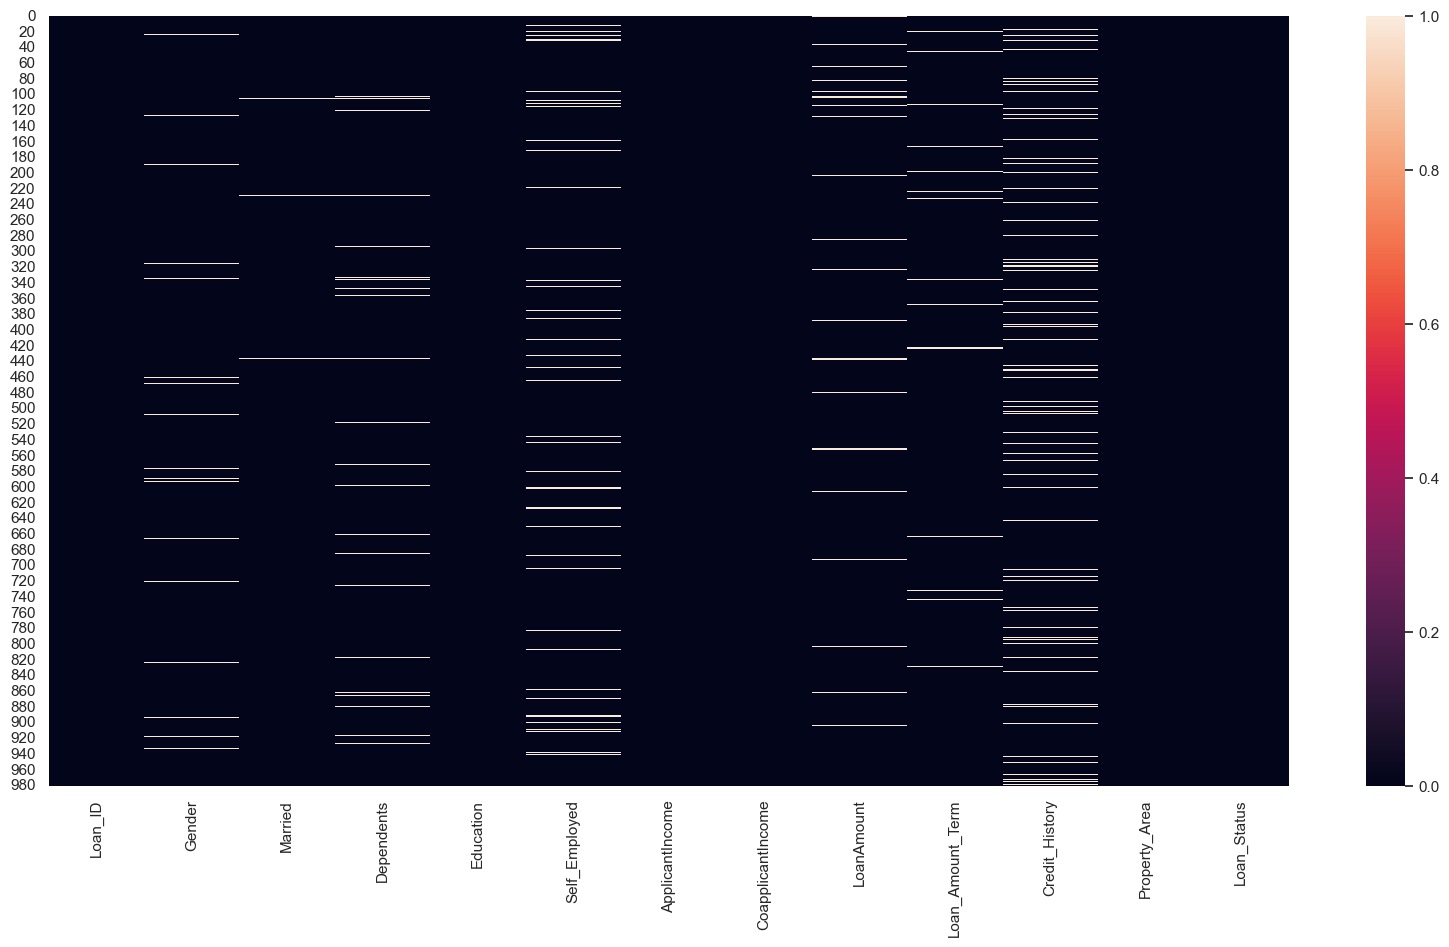

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(data_all.isnull(),cbar=True)
sns.heatmap

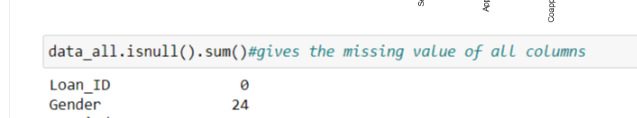

In [11]:
data_all.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

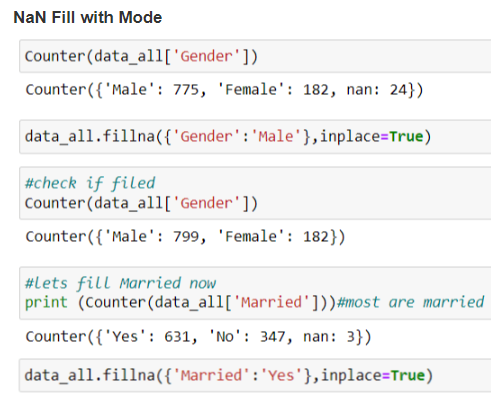

In [16]:
Counter(data_all["Gender"])

Counter({'Male': 799, 'Female': 182})

In [15]:
data_all.fillna({"Gender":"Male"},inplace=True)

In [17]:
Counter(data_all["Married"])
data_all.fillna({"Married":"Yes"},inplace=True)


In [18]:
data_all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

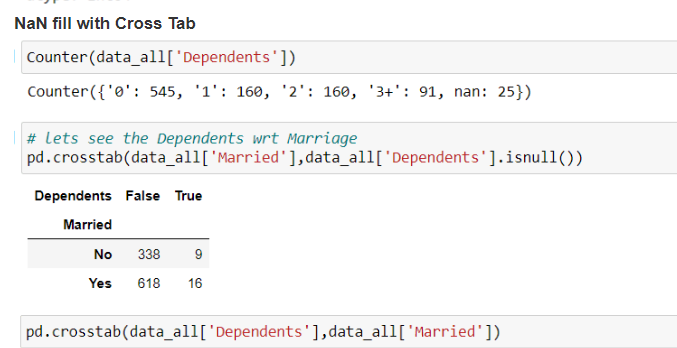

In [19]:
Counter(data_all["Dependents"])

Counter({'0': 545, '1': 160, '2': 160, '3+': 91, nan: 25})

In [22]:
pd.crosstab(data_all["Married"],data_all["Dependents"].isnull())

Dependents,False,True
Married,,
No,338,9
Yes,618,16


In [17]:
pd.crosstab(data_all["Married"],data_all["Dependents"])

Dependents,0,1,2,3+
Married,,,,
No,276,36,14,12
Yes,269,124,146,79


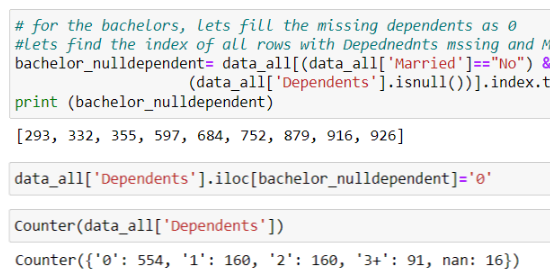

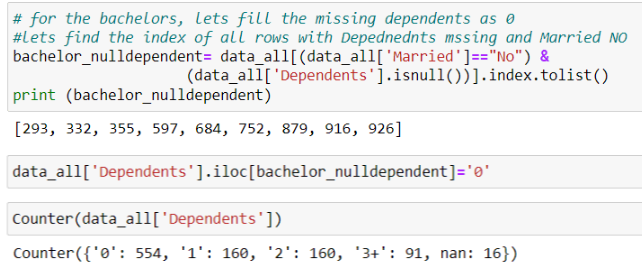

In [23]:
bachlor_nulldependent=data_all[(data_all["Married"]=="No")
                               & (data_all["Dependents"].isnull())].index.tolist()

In [24]:
bachlor_nulldependent

[293, 332, 355, 597, 684, 752, 879, 916, 926]

In [26]:
data_all["Dependents"].iloc[bachlor_nulldependent]="0"

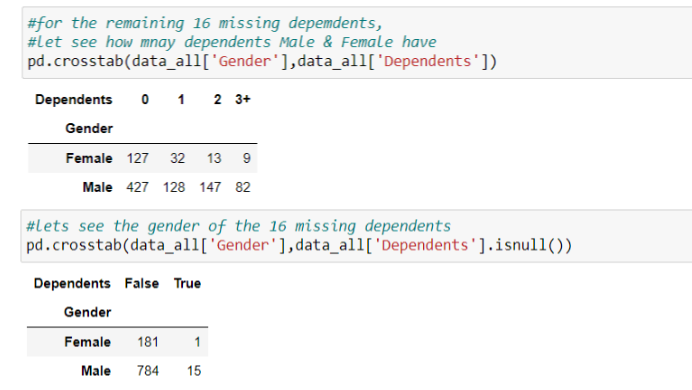

In [27]:
pd.crosstab(data_all["Gender"],data_all["Dependents"])

Dependents,0,1,2,3+
Gender,,,,
Female,127,32,13,9
Male,427,128,147,82


In [28]:
pd.crosstab(data_all["Gender"],data_all["Dependents"].isnull())

Dependents,False,True
Gender,,
Female,181,1
Male,784,15


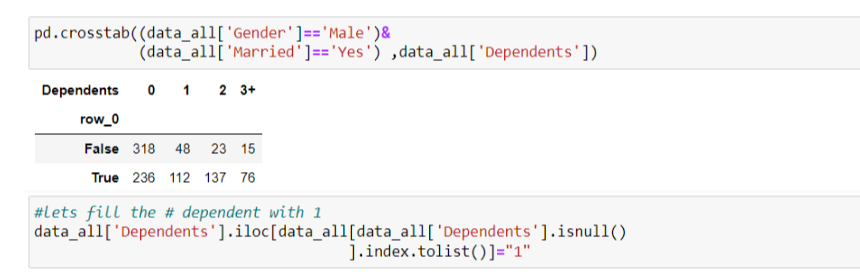

In [29]:
data_all["Dependents"].iloc[data_all[data_all["Dependents"].isnull()].index.tolist()]="1"

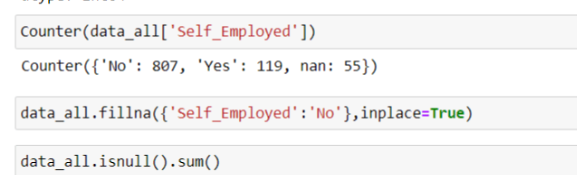

In [30]:
Counter(data_all["Self_Employed"])

Counter({'No': 807, 'Yes': 119, nan: 55})

In [31]:
data_all.fillna({"Self_Employed":"No"},inplace=True)

In [32]:
data_all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

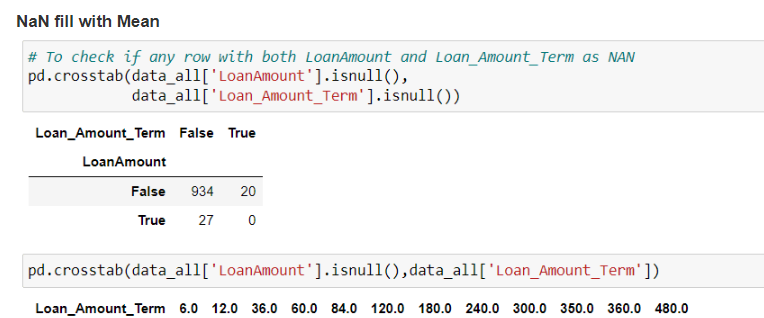

In [33]:
pd.crosstab(data_all["LoanAmount"].isnull(),data_all["Loan_Amount_Term"])

Loan_Amount_Term,6.0,12.0,36.0,60.0,84.0,120.0,180.0,240.0,300.0,350.0,360.0,480.0
LoanAmount,,,,,,,,,,,,
False,1,2,3,3,7,4,64,7,20,1,800,22
True,0,0,0,0,0,0,2,1,0,0,23,1


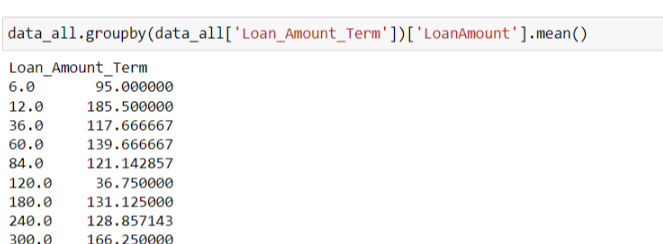

In [34]:
data_all.groupby(data_all["Loan_Amount_Term"])["LoanAmount"].mean()

Loan_Amount_Term
6.0       95.000000
12.0     185.500000
36.0     117.666667
60.0     139.666667
84.0     121.142857
120.0     36.750000
180.0    131.125000
240.0    128.857143
300.0    166.250000
350.0    133.000000
360.0    144.420000
480.0    137.181818
Name: LoanAmount, dtype: float64

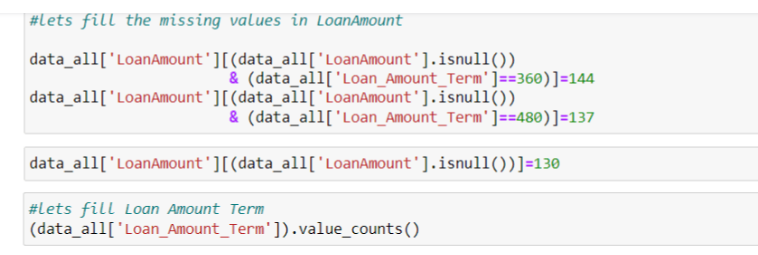

In [36]:
data_all["LoanAmount"][(data_all["LoanAmount"].isnull())&(data_all["Loan_Amount_Term"]==360)]=144
data_all["LoanAmount"][(data_all["LoanAmount"].isnull())&(data_all["Loan_Amount_Term"]==480)]=137



In [37]:
data_all["LoanAmount"][(data_all["LoanAmount"].isnull())]=130

In [38]:
(data_all["Loan_Amount_Term"]).value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
60.0       3
36.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

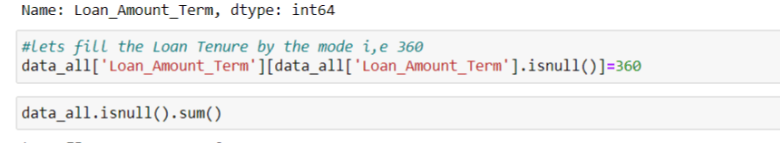

In [39]:
data_all["Loan_Amount_Term"][data_all["Loan_Amount_Term"].isnull()]=360

In [36]:
data_all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

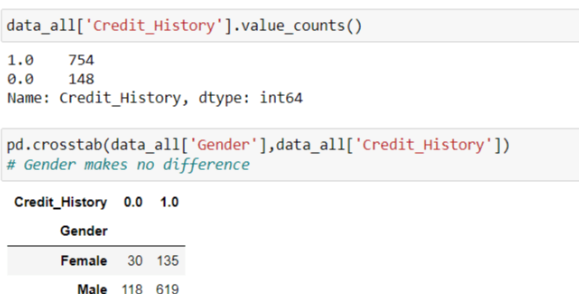

In [41]:
data_all["Credit_History"].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [42]:
pd.crosstab(data_all["Gender"],data_all["Credit_History"])

Credit_History,0.0,1.0
Gender,,
Female,30,135
Male,118,619


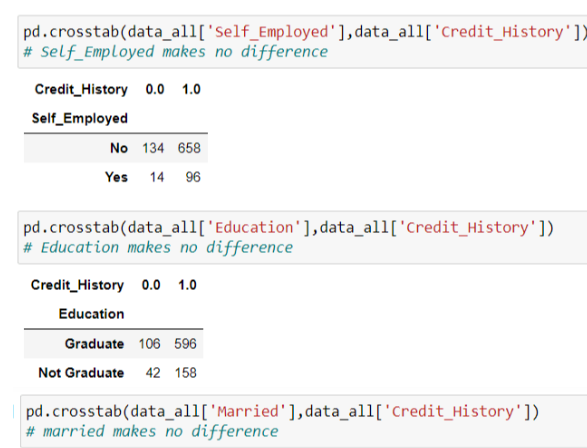

In [43]:
pd.crosstab(data_all["Self_Employed"],data_all["Credit_History"])

Credit_History,0.0,1.0
Self_Employed,,
No,134,658
Yes,14,96


In [44]:
pd.crosstab(data_all["Education"],data_all["Credit_History"])

Credit_History,0.0,1.0
Education,,
Graduate,106,596
Not Graduate,42,158


In [45]:
pd.crosstab(data_all["Married"],data_all["Credit_History"])

Credit_History,0.0,1.0
Married,,
No,56,263
Yes,92,491


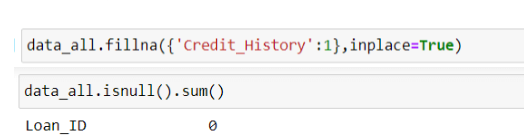

In [46]:
data_all.fillna({"Credit_History":1},inplace=True)
data_all.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

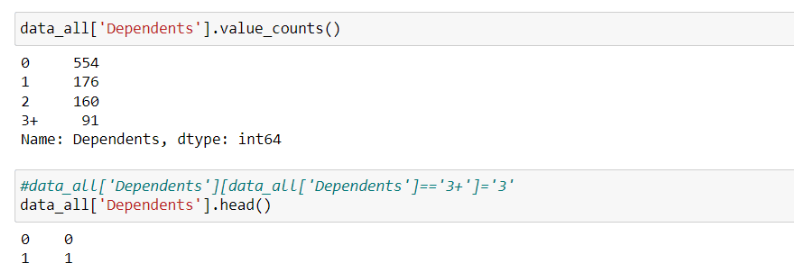

In [47]:
data_all["Dependents"].value_counts()
data_all["Dependents"].head()

0    0
1    1
2    0
3    0
4    0
Name: Dependents, dtype: object

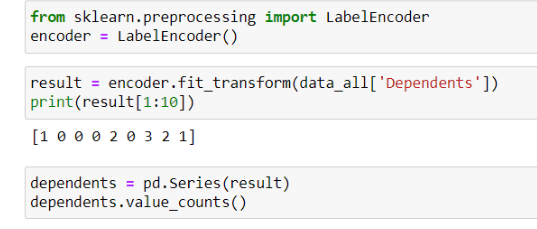

In [48]:
data_all

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,144.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,1.0,Semiurban,Y
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,N


In [49]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [50]:
result=encoder.fit_transform(data_all["Dependents"])
print(result[1:10])

[1 0 0 0 2 0 3 2 1]


In [62]:
dependents=pd.Series(result)
dependents.value_counts()


0    554
1    176
2    160
3     91
dtype: int64

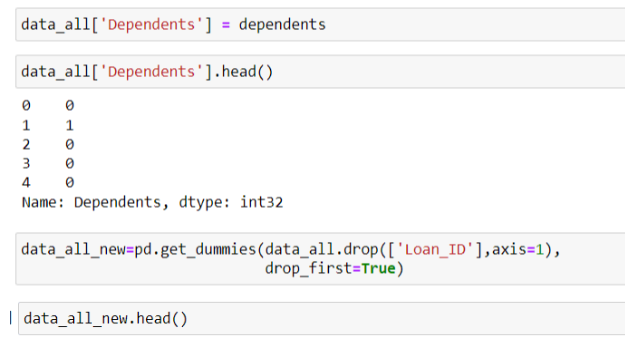

In [63]:
data_all["Dependents"]=dependents

In [64]:
data_all

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,144.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,1.0,Semiurban,Y
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,N


In [65]:
data_all["Dependents"].head()

0    0
1    1
2    0
3    0
4    0
Name: Dependents, dtype: int32

In [66]:
data_all_new=pd.get_dummies(data_all.drop(["Loan_ID"],axis=1),drop_first=True)

In [67]:
data_all_new.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0,5849,0.0,144.0,360.0,1.0,1,0,0,0,0,1,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1


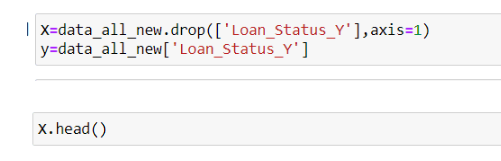

In [68]:
x=data_all_new.drop(["Loan_Status_Y"],axis=1)
y=data_all_new["Loan_Status_Y"]
x.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,144.0,360.0,1.0,1,0,0,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1


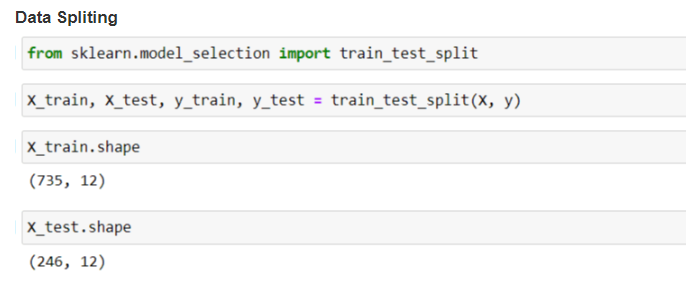

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train, x_test,y_train,y_test=train_test_split(x,y)

In [71]:
x_train.shape

(735, 12)

In [72]:
x_test.shape

(246, 12)

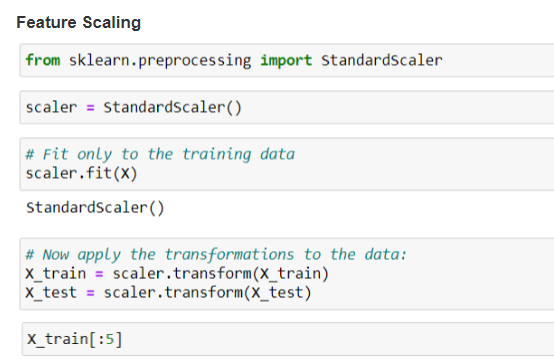

In [73]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [74]:
scaler.fit(x)

StandardScaler()

In [75]:
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [77]:
x_train

array([[-0.76421042, -0.22008975, -0.29510571, ..., -0.37155221,
         1.34569248, -0.73158135],
       [-0.76421042,  2.74993885,  1.86395392, ..., -0.37155221,
        -0.74311183,  1.36690199],
       [-0.76421042, -0.56969089, -0.16556949, ..., -0.37155221,
         1.34569248, -0.73158135],
       ...,
       [-0.76421042,  2.55616495,  1.34838506, ..., -0.37155221,
        -0.74311183, -0.73158135],
       [-0.76421042, -0.05916782,  0.81110415, ..., -0.37155221,
         1.34569248, -0.73158135],
       [ 0.2106796 , -0.40472834, -0.01542524, ..., -0.37155221,
        -0.74311183,  1.36690199]])

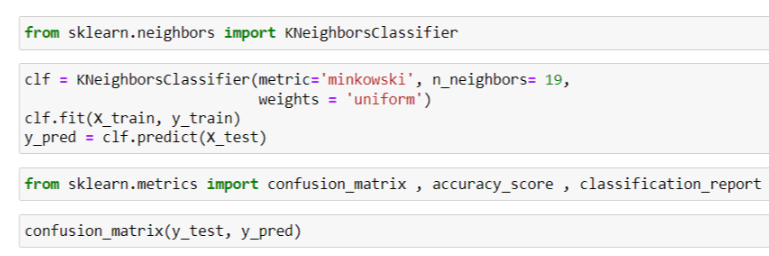

In [80]:
from sklearn.neighbors import KNeighborsClassifier


In [84]:
clf=KNeighborsClassifier(metric="minkowski",n_neighbors=19,weights="uniform")
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [85]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [86]:
confusion_matrix(y_test,y_pred)

array([[ 34,  37],
       [  1, 174]], dtype=int64)

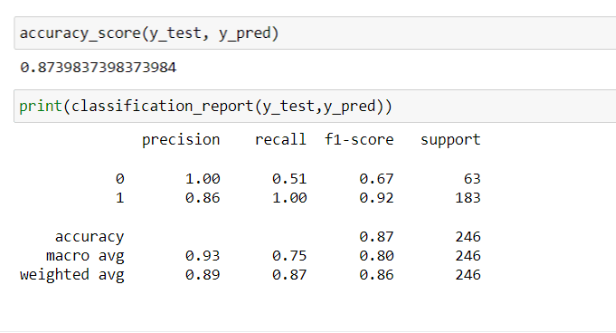

In [87]:
accuracy_score(y_test,y_pred)


0.8455284552845529

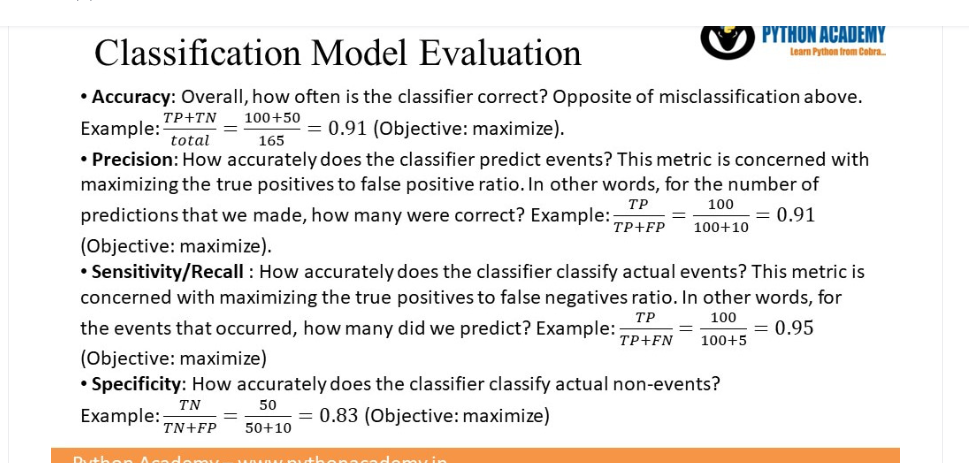

In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.48      0.64        71
           1       0.82      0.99      0.90       175

    accuracy                           0.85       246
   macro avg       0.90      0.74      0.77       246
weighted avg       0.87      0.85      0.83       246

